In [1]:
# Import Pandas
import pandas as pd

# Import Pyplot
import matplotlib.pyplot as plt

# Import Seaborn
import seaborn as sns

#Import the historical MN state level data from the COVID Tracking Project
url="https://covidtracking.com/api/v1/states/mn/daily.csv"
MNCovid=pd.read_csv(url)

In [2]:
#Re-order the data by date, and then reindex
MNCovid = MNCovid[::-1].reset_index()

In [3]:
# Convert the dates column from a string into a datetime object
MNCovid['dateTime'] = pd.to_datetime(MNCovid['date'].astype(str), format='%Y%m%d')

In [4]:
#Create a new column for the test positivity rate
MNCovid["positiveRate"] = MNCovid["positiveIncrease"] / MNCovid["totalTestResultsIncrease"]

In [5]:
#Create a new column for 7 day average of tests completed
MNCovid['newTests7Day'] = MNCovid.iloc[:,31].rolling(window=7).mean()

In [6]:
#Create a new column for 7 day average of positive test results
MNCovid['newPositive7Day'] = MNCovid.iloc[:,27].rolling(window=7).mean()

In [7]:
#Create a new column for 7 day average of positive test rate
MNCovid['positiveRate7Day'] = MNCovid['newPositive7Day'] / MNCovid['newTests7Day']

In [12]:
# Output to CSV file without the index
MNCovid.to_csv('MNCovid.csv', index=False)

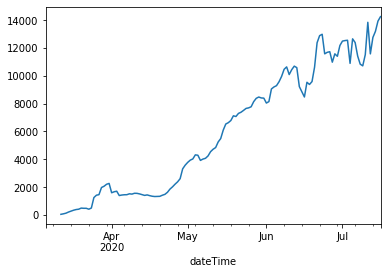

In [9]:
#Plot 7 days average of tests completed as a line plot
MNCovid.set_index('dateTime')['newTests7Day'].plot();

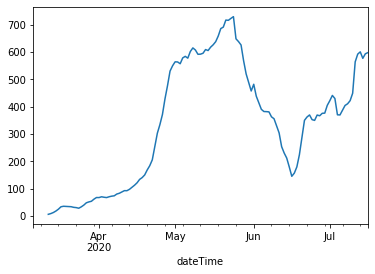

In [10]:
#Plot 7 days average of positive tests as a line plot
MNCovid.set_index('dateTime')['newPositive7Day'].plot();

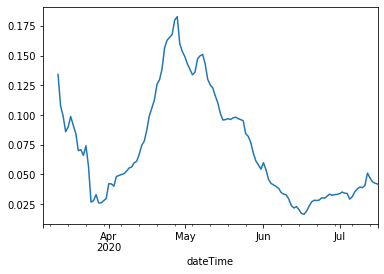

In [8]:
#Plot 7 days average of positivity rate as a line plot
MNCovid.set_index('dateTime')['positiveRate7Day'].plot();